Amazing collection of bitmap fonts:
https://github.com/Tecate/bitmap-fonts/tree/master

In [3]:
%load_ext autoreload
%autoreload 2

from ui_board.ui_board import UiBoard, GuiPrimitives, load_img
from PIL import Image, ImageFont, ImageDraw
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
F_ROBOTO = ImageFont.truetype("Roboto-Regular.ttf", 20)
F_CREEP = ImageFont.truetype("creep.bdf", 16)

In [5]:
ui = UiBoard()

In [31]:
ui.ssd1322.set_brightness(15)

In [37]:
ui.ssd1322.set_inverted(0)

In [9]:
ui.mcp.set_leda(1)

In [10]:
ui.mcp.set_ledb(4)

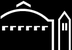

In [20]:
i_lbl = load_img('lbl.png', 0.5)
i_lbl

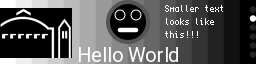

In [60]:
img = Image.new("L", (256, 64), color=0)

dr = ImageDraw.Draw(img)

# Anti-aliased drawing
g = GuiPrimitives(img)

# Bar with Greyscale levels
for i in range(16):
    g.rectangle(i * 16 + 8, 32, 16, 64, fill=15 - i)

# Creepy smiley
g.dot(128, 22, 40, outline=5, linewidth=4, fill=0)
g.dot(120, 15, 10, outline=15)
g.dot(136, 15, 10, outline=15)
g.rectangle(128, 30, w=20, h=4, r=2, fill=15)

# Dot-bar indicating which screen is on
g.dot_bar(1, r=3, N=6)

g.draw.flush()

# Text / icons
dr.text((128, 62), "Hello World", 255, F_ROBOTO, 'ms')
dr.text((165, 12), "Smaller text\nlooks like\nthis!!!", 255, F_CREEP, 'ls')

# LBL logo (bitmap)
img.paste(i_lbl, (0, 8))

ui.send_img(img)
img